## Loading Libraries

In [2]:
library('ggplot2')
library('gridExtra')
require('randomForest')
library(RColorBrewer)
library(grid)
library(ggsignif)

## Plotting functions

In [3]:
add_corner_label <- function(p, letter){
    newp <- arrangeGrob(p, top=textGrob(letter, x=unit(0, "npc"), y=unit(1, "npc"), just=c("left", "top")))
    return(newp)
}

## Set working directory and output directories

In [4]:
projectdir="../"
setwd(projectdir)
paperfigdir="figures"
supfigdir="figures/supfigures"

# Scatter plots of SV versus predictions

### Scatter plots

In [5]:
my_scatter_plot <- function(x, y, myxlim=NULL, myylim=NULL, quantile=FALSE, myxlab="x values", myylab="y values"){
    #df <- data.frame(x=x, y=y)
    df <- data.frame(x=x, y=y, d=densCols(x,y))
    if (quantile){
        myylim=quantile(df$y, c(0.01, .99))
        myxlim=quantile(df$x, c(0.01, .99))
    }
    p=cor.test(df$x, df$y)
    if (p$p.value == 0){
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="")} #, "\n p-value < 2.2e-16", sep="")
    else {
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="")} # "\n p-value: ", round(p$p.value, digits=4), sep="")}
    # ggMarginal is being weird with using scale_x_continuous, so need to filter the data with the x and y limits 
    myi = df$x<=myxlim[2] & df$x >= myxlim[1] & df$y <= myylim[2] & df$y >= myylim[1]
    p1 <- ggplot(df[myi,], aes(x,y)) + geom_point(size=.1, alpha=0.1) + 
        xlab(paste0(myxlab, "\n\n")) + ylab(paste0("\n\n", myylab)) +
        annotate("text", x=-Inf, y=Inf, label=mytext, vjust=1.1, hjust=0, size=3) + 
        theme(axis.text=element_text(size=8), text=element_text(size=9), 
              plot.title=element_text(size=1))
        #stat_density2d(aes(fill=..level..), geom="polygon")+ scale_fill_gradient(low="blue", high="orange")
    pf <- ggExtra::ggMarginal(p1, type="density", size=5, margin="both")
    return(pf)
}

my_scatter_density_plot <- function(x, y, myxlim=NULL, myylim=NULL, quantile=FALSE, myxlab="x values", myylab="y values"){
    df <- data.frame(x=x, y=y, d=densCols(x,y, bandwidth=c(0.5, 2)))
    if (quantile){
        myylim=quantile(df$y, c(0.01, .99))
        myxlim=quantile(df$x, c(0.01, .99))
    } 
    p=cor.test(df$x, df$y, method="spearman")
    if (p$p.value < 2.2e-16){
        mytext=paste(" Spearman's rho: ", round(p$estimate, digits=4), 
                     "\n p-value < 2.2e-16", sep="")}
    else{
        mytext=paste(" Spearman's rho: ", round(p$estimate, digits=4), "\n p-value: ", 
            signif(p$p.value, digits=4), sep="")}    
    myi = df$x<=myxlim[2] & df$x >= myxlim[1] & df$y <= myylim[2] & df$y >= myylim[1]
    p1 <- ggplot(df[myi,]) + geom_point(aes(x, y, col=d), size=.6, alpha=0.2) + scale_color_identity() + 
        labs(x=paste0(myxlab, "\n\n"), y=paste0("\n\n", myylab)) + 
        annotate("text", x=-Inf, y=Inf, label=mytext, vjust=1.1, hjust=0, size=3) + 
        theme(axis.text=element_text(size=8), text=element_text(size=9), 
              plot.title=element_text(size=1))
    pf <- ggExtra::ggMarginal(p1, type="density", size=5, margin="both")
    return(pf)
}



## FigureS5: ICGC SV versus DSB

Warning message in cor.test.default(df$x, df$y, method = "spearman"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(df$x, df$y, method = "spearman"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(df$x, df$y, method = "spearman"):
“Cannot compute exact p-value with ties”

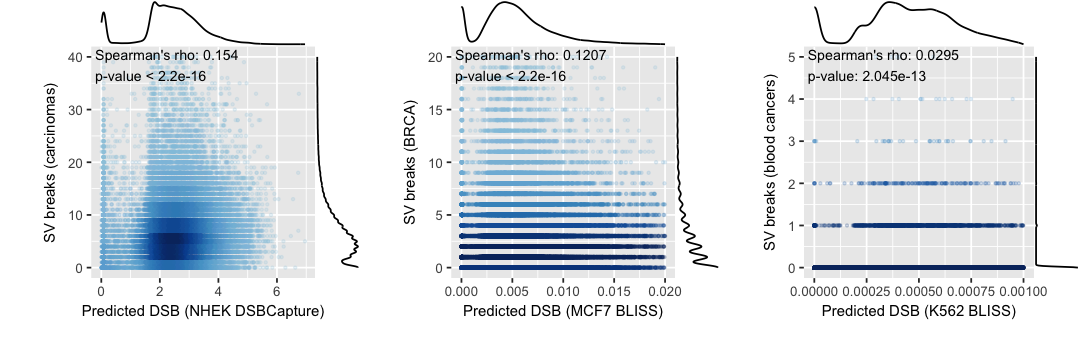

In [8]:
svdat <- read.table("data/cancer_SVcnts/icgc/carc_realcnts.txt", header=TRUE)
pdat <- read.table("data/randforest_results/NHEK_BREAK/predicted.txt", header=TRUE)
sp1 <- my_scatter_density_plot(x=pdat$predicted, y=svdat$any, 
                myxlim=c(0,7), myylim=c(0,40), quantile=FALSE, 
                myxlab="Predicted DSB (NHEK DSBCapture)", myylab="SV breaks (carcinomas)")

svdat <- read.table("data/cancer_SVcnts/icgc/brca_realcnts.txt", header=TRUE)
pdat <- read.table("data/randforest_results/MCF7_BLISS/predicted.txt", header=TRUE)
sp2 <- my_scatter_density_plot(x=pdat$predicted, y=svdat$any, 
                myxlim=c(0,0.02), myylim=c(0,20), quantile=FALSE, 
                myxlab="Predicted DSB (MCF7 BLISS)", myylab="SV breaks (BRCA)")

svdat <- read.table("data/cancer_SVcnts/icgc/blood_realcnts.txt", header=TRUE)
pdat <- read.table("data/randforest_results/K562_BLISS/predicted.txt", header=TRUE)
sp3 <- my_scatter_density_plot(x=pdat$predicted, y=svdat$any, 
                myxlim=c(0,0.001), myylim=c(0,5), quantile=FALSE, 
                myxlab="Predicted DSB (K562 BLISS)", myylab="SV breaks (blood cancers)")

options(repr.plot.width=9, repr.plot.height=3)
grid.arrange(sp1, sp2, sp3, ncol=3)
gf <- arrangeGrob(sp1, sp2, ncol=2)
ggsave(file="SupFigure5_pred_vs_sv.png", plot=gf, path=supfigdir, width=6, height=3, units="in", dpi=300)

# Class enrichments

## Plotting functions

### Violin Plots

In [18]:
make_into_stars<-function(x){
    s=""
    if (x <= 0.05){s="*"}
    if (x <= 0.01){s="**"}
    if (x <= 0.001){s="***"}
    if (x <= 0.0001){s="****"}
    return(s)
}

make_annotation_type_boxdata2 <- function(dscores, adat, types, nlab="refGenes"){
    myi <- adat[,which(names(adat)==nlab)]>0
    dfn <- data.frame(dat=dscores[myi], label=nlab)
    dfbox=dfn
    wctests = c(1)
    for (mylabel in types) {
        myi <- adat[,which(names(adat)==mylabel)]>0
        mydf = data.frame(dat = dscores[myi], label=mylabel)
        dfbox = data.frame(rbind(dfbox, mydf))
        wctests = c(wctests, wilcox.test(mydf$dat, dfn$dat, alternative="greater")$p.value)
    }
    return(list(dfbox, wctests))
}


make_tissue_type_violinplots2 <- function(dfbox, myks, mycols=c("grey", brewer.pal(8,"Paired")), lims=c(-10,10), ylab=NULL){
    mylabs=rle(as.character(dfbox$label))$values
    newlabs=c()
    for (i in seq_along(mylabs)){
        pn <- prettyNum(sum(dfbox$label== mylabs[i]), big.mark=",", scientific=TRUE)
        newl = paste0(mylabs[i],"\n(", pn, ")")
        #newl = bquote(.(paste0(mylabs[i], "\n")) ( .(pn) >= .(mycfs[i]) ))
        newlabs=c(newlabs, newl)
    }
    pbox <- ggplot(dfbox, aes(x=label, y=dat)) + geom_violin() + 
    geom_boxplot(colour=mycols, fill=mycols, alpha=0.5, outlier.colour=NULL, width=0.2) + 
    labs(x="", y=ylab) + ylim(lims) + 
    scale_x_discrete(labels=newlabs) + 
    theme(axis.text.x = element_text(angle = 90, hjust=0.5, vjust=0.5, size=8), axis.title=element_text(size=10)) + 
    annotate("text", x=seq(1,(length(myks))), y=lims[2], label=unlist(lapply(myks, make_into_stars)))
    return(pbox)
}

### Scatter plot

In [9]:
scatter_plot_categories2 <- function(datf, pcf=0.01, predlowcf=0.5, myxlim=c(0,10), myylim=c(0,50)) {
    pvalcf=log(pcf, base=10)
    dscorecf = qt(pcf, df=4, lower.tail=FALSE)
    dnullcf = qt(.7 + pcf, df=4, lower.tail=TRUE)
    datf$dscore[datf$dscore < -10]=-10.1
    datf$dscore[datf$dscore > 10]=10.1
    
    cancHpredL <- datf[(datf$dscore > dscorecf) & (datf$predicted > predlowcf),]
    cancHpredL$subset="cancHpredL"
    cancHpredH <- datf[(datf$log.p < pvalcf) & (datf$predlogp < pvalcf)  & 
                       (datf$dscore < dnullcf) & (datf$dscore > -1 * dnullcf) & 
                       (datf$predicted > predlowcf),]
    cancHpredH$subset="cancHpredH"
    predHcancL <- datf[(datf$dscore < -1 * dscorecf) & (datf$predicted > predlowcf),]
    predHcancL$subset="cancLpredH"
    #predHcancH <- datf[(datf$dscore > -1 *dscorecf) & (datf$predicted >= min(predHcancL$predicted)) & (datf$predicted > predlowcf),]
    #predHcancH$subset="predHcancH"
    cancHpredL2 <-datf[(datf$log.p < pvalcf) & (datf$predicted < predlowcf),]
    cancHpredL2$subset="cancHpredL2"
    
    dat2=rbind(cancHpredL, cancHpredH, predHcancL, cancHpredL2)
    
    mycols <- brewer.pal(5,"Set1")
    mycolvals <- c("cancHpredH"=mycols[5], 
               "cancHpredL"=mycols[1], 
               "cancLpredH"=mycols[2], 
               "cancHpredL2"=mycols[3])
    mylabs=c("cancHpredL", "cancHpredH", "cancLpredH", "cancHpredL2")
    newlabs=c()
    for (i in seq_along(mylabs)){
        pn <- prettyNum(sum(dat2$subset == mylabs[i]), big.mark=",", scientific=TRUE)
        newl = paste0(mylabs[i], "\n(", pn, ")\n")
        newlabs=c(newlabs, newl)
    }
    myscale <- scale_fill_manual(values=mycolvals, breaks=mylabs, labels=newlabs)
    p1 <- ggplot(datf) + geom_point(aes(x=predicted, y=realcnt, col=dscore), size=0.6, alpha=1) + 
        xlim(myxlim) + ylim(myylim) + scale_colour_gradient2() +
        labs(x="Predicted DSB", y="SV breaks", colour="d-score") +
        geom_point(data=dat2, aes(x=predicted, y=realcnt, fill=subset), 
                          shape=21, alpha=1, size=.6, stroke=0, show.legend=F) + myscale
        #guides(colour=FALSE, fill=guide_legend(override.aes=list(size=3)))
    return(p1)
}


### Barplots

In [16]:
mycols <- brewer.pal(5,"Set1")
mycolvals <- c("cancHpredH"=mycols[5], 
               "cancHpredL"=mycols[1], 
               "cancLpredH"=mycols[2], 
               "cancHpredL2"=mycols[3])

barplot_circperm_chromstates <- function(pdat, mynames1=NULL, mynames2=NULL, mycvals=mycolvals, fixChromHMMname=FALSE){
    grpnames=c("cancHpredH", "cancHpredL", "cancLpredH", "cancHpredL2")
    grplabels=grpnames #c("SV lukewarm", "SV hotspots", "Pred Low A", "SV coldspots", "Pred cold")
    mylabels1=c()
    mycols1=c()
    if (is.null(mynames1)){
        mynames1=levels(as.factor(pdat$bedB))
        for (i in seq_along(mynames1)){
            s=paste(mynames1[i], " ", "(", prettyNum(pdat[pdat$bedB==mynames1[i],]$Bcnt[1], big.mark=","), ")", sep="")
            #s=mynames1[i]
            mylabels1[i]=s
        }
    }
    else {
        for (i in seq_along(mynames1)){
            i2=which(grpnames==mynames1[i])
            s=paste(grplabels[i2], " ", "(", prettyNum(pdat[pdat$bedB==mynames1[i],]$Bcnt[1], big.mark=","), ")", sep="")
            #s=mynames1[i]
            mylabels1[i]=s
        }
    }
    mylabels2=c()
    if (is.null(mynames2)){
        mynames2=levels(as.factor(pdat$bedA))
    }
    for (i in seq_along(mynames2)){
        if(mynames2[i]=="cosmic_refGene"){n="Cosmic"}
        else if (mynames2[i]=="cancerGenes260"){n="Cancer5000"}
        else if (mynames2[i]=="refGene"){n="RefGenes"}
        else if (mynames2[i]=="fragile_sites"){n="Fragile Sites"}
        else if (mynames2[i]=="all_fragile_sites"){n="Fragile Sites"}
        else if (fixChromHMMname==TRUE) {n= sub('[[:digit:]]+_', '', mynames2[i]); n=sub('_', ' ', n)}
        else {n=mynames2[i]}
        #s=paste(n, "\n", "(", prettyNum(pdat[pdat$bedA==mynames2[i],]$Acnt[1], big.mark=","), ")", sep="")
        s=n
        mylabels2[i]=s
    }
    pdat <- pdat[which(pdat$bedB %in% mynames1),]
    pdat <- pdat[which(pdat$bedA %in% mynames2),]
    pdat$bedB <- factor(pdat$bedB, levels=mynames1)
    pdat$bedA <- factor(pdat$bedA, levels=mynames2)
    p <- ggplot(pdat, aes(x=bedA, y=-log(pvalue, base=10)*sign(zscore)))
    pb = p + geom_bar(stat = "identity", aes(fill = bedB), position="dodge") +
        labs(x="", fill="Annotation Set", y="-log(p-value)")  + 
        theme(text=element_text(size=12), axis.text.x=element_text(size=8.5, angle=90, hjust=1, vjust=0.5), 
              axis.title.x=element_blank(),
              legend.text=element_text(size=8), legend.title=element_text(size=10), 
              panel.border = element_blank()) + 
        scale_fill_manual(values=mycolvals, breaks=mynames1, labels=mylabels1) +   
        scale_x_discrete(limits=mynames2, labels=mylabels2) +
        scale_y_continuous(limits=c(-2.5,3.2), expand=c(0,0)) +
        geom_hline(yintercept=2, color="orange", linetype="dashed") + 
        geom_hline(yintercept=-2, color="orange", linetype="dashed")
        #scale_fill_manual(labels=c("CancerGenes260", "Cosmic Genes"), values=mysetcols[1:3])
    return(pb)
}

### Plotting options

In [10]:
mynames=c("cancHpredL", "cancHpredH", "cancLpredH", "cancHpredL2")
mynames1=c("refGene", "cancerGenes260", "cosmic_refGene", "A549_SEA", "all_fragile_sites")
mynames2=c("1_Active_Promoter", "3_Poised_Promoter", "4_Strong_Enhancer", "8_Insulator", "12_Repressed")
mynames3=c(mynames1, mynames2)

### Annotation file for violin plots

In [29]:
annfile <- "data/dscores/annotations.txt"
adat <- read.table(annfile, header=TRUE)
types=labels(adat)[[2]][c(5,6,8)]
types
mycolors=c("grey", brewer.pal(3, "Set2"))

[1] "Cosmic"   "Genes260" "CFS"

### Panel plotting function

In [14]:
make_dscores_plots_panel <- function(dataname, mytitle=NULL, pcf=0.01, predlowcf=0.5, 
                                     myxlim=c(0,7), myylim=c(0,80), myylimv=10, mydlim=c(-10,10)){
    mydataset=dataname
    ddat <- read.table(paste0("data/dscores/", mydataset, ".dlogp.txt"), header=TRUE)

    sp1 <- scatter_plot_categories2(datf=ddat, pcf=pcf, predlowcf=predlowcf, myxlim=myxlim, myylim=myylim)
    pdat1=read.table(paste0("data/dscores/", mydataset, "/circ_genes.dat"), header=TRUE, sep="\t")
    pdat2=read.table(paste0("data/dscores/",mydataset, "/circ_chrom.dat"), header=TRUE, sep="\t")
    pdat <- rbind(pdat1, pdat2)
    pb2 <- barplot_circperm_chromstates(pdat, mynames1=mynames, mynames2=mynames3, fixChromHMMname=TRUE)

    sp1a <- add_corner_label(sp1, "c")
    pb2b <- add_corner_label(pb2, "d")
    g1 <- arrangeGrob(sp1a, pb2b, ncol=2, widths=c(1.2, 1.8))

    re <- make_annotation_type_boxdata2(ddat$predicted, adat, types)
    v1 <- make_tissue_type_violinplots2(re[[1]], re[[2]], mycols=mycolors, lims=c(0,myylimv), ylab="Predicted DSB")
    v1c <- add_corner_label(v1, "a")
    re <- make_annotation_type_boxdata2(ddat$dscore, adat, types)
    v2 <- make_tissue_type_violinplots2(re[[1]], re[[2]], mycols=mycolors, lims=mydlim, ylab="d-score")
    v2d <- add_corner_label(v2, "b")
    gv <- arrangeGrob(v1c,v2d, ncol=2, top=mytitle)
    gf <- arrangeGrob(gv, g1)
    return(gf)
}


## Figure6: nhek.icgc_carc

Warning message:
“Removed 47 rows containing missing values (geom_point).”Warning message:
“Removed 47 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 7 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

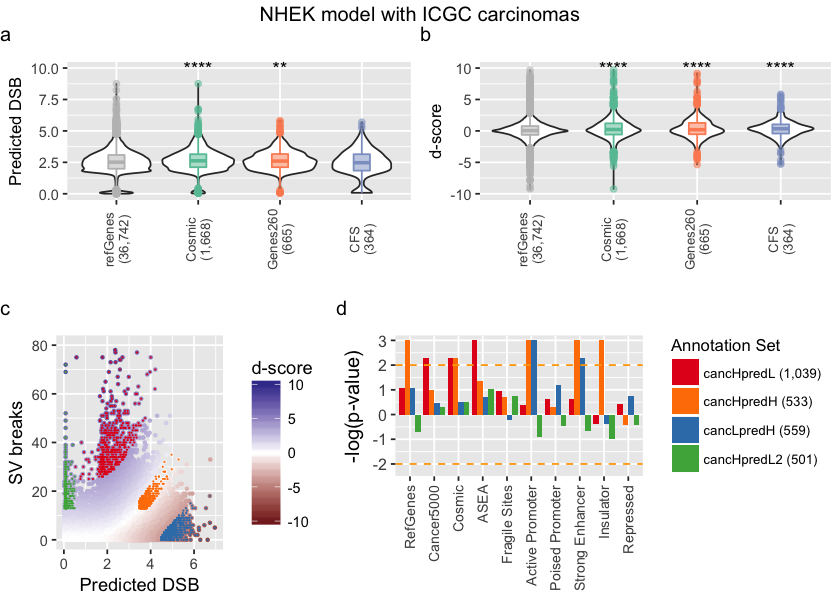

In [33]:
g <- make_dscores_plots_panel(dataname="nhek.icgc_carc", mytitle="NHEK model with ICGC carcinomas", 
                              pcf=0.01, predlowcf=0.5, myxlim=c(0,7), myylim=c(0,80), myylimv=10, mydlim=c(-10,10))
options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(g)
#ggsave(file="Figure6.pdf", plot=g, path=paperfigdir, width=7, height=5, units="in")
ggsave(file="Figure6.png", plot=g, path=paperfigdir, width=7, height=5, units="in", dpi=300)

## FigureS7: mcf7.icgc_brca

Warning message:
“Removed 86 rows containing missing values (geom_point).”Warning message:
“Removed 86 rows containing missing values (geom_point).”Warning message:
“Removed 51 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 51 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”

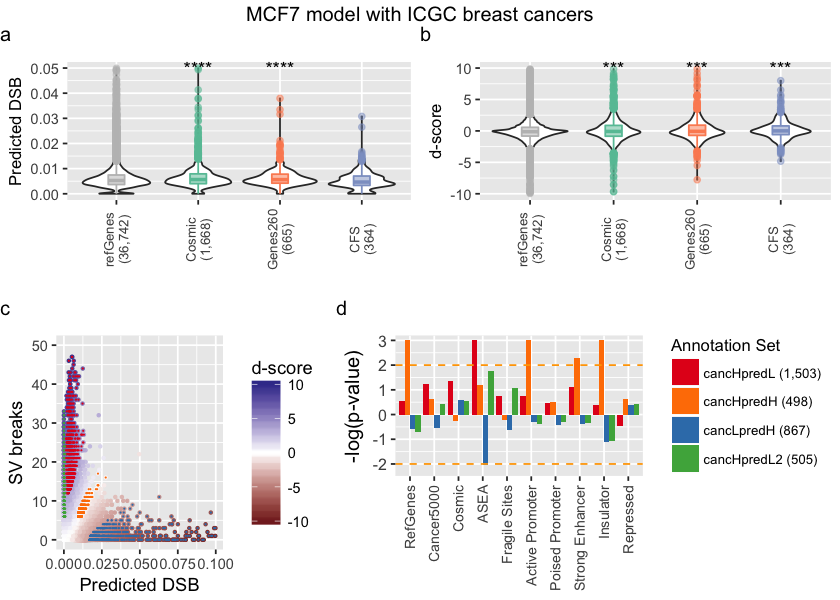

In [34]:
g <- make_dscores_plots_panel(dataname="mcf7.icgc_brca", mytitle="MCF7 model with ICGC breast cancers", 
                              pcf=0.01, predlowcf=0.001, myxlim=c(0,.1), myylim=c(0,50), myylimv=.05, mydlim=c(-10,10))

options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(g)
ggsave(file="SupFigure7.pdf", plot=g, path=supfigdir, width=7, height=5, units="in")
ggsave(file="SupFigure7.png", plot=g, path=supfigdir, width=7, height=5, units="in", dpi=300)

## nhek.tcga_scca

Warning message:
“Removed 416 rows containing missing values (geom_point).”Warning message:
“Removed 416 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 174 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 174 rows containing non-finite values (stat_boxplot).”

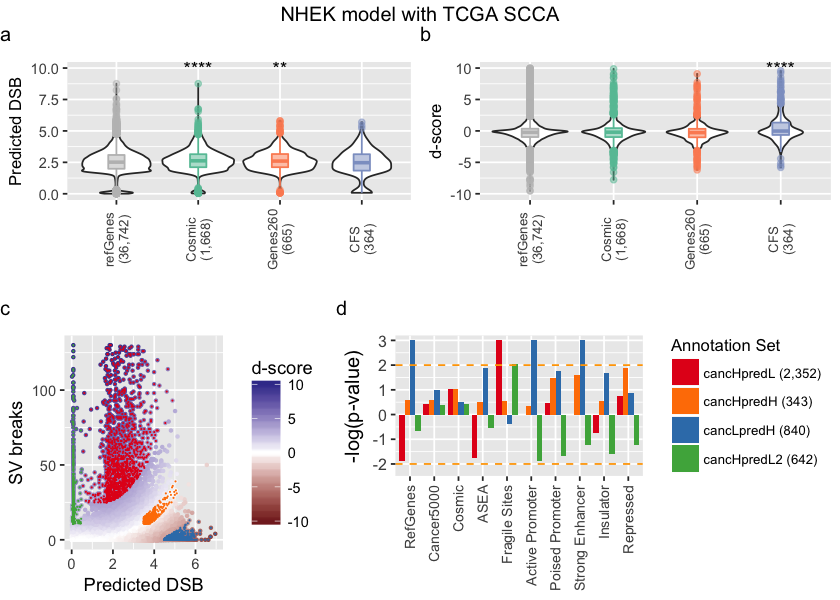

In [35]:
g <- make_dscores_plots_panel(dataname="nhek.tcga_scca", mytitle="NHEK model with TCGA SCCA", 
                              pcf=0.01, predlowcf=0.5, myxlim=c(0,7), myylim=c(0,130), myylimv=10, mydlim=c(-10,10))

options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(g)

# FigureS8: ChromHMM enrichments HMM state enrichments

In [37]:
mynames=c("cancHpredL", "cancHpredH", "cancLpredH", "cancHpredL2")
pdat1 <- read.table("data/dscores/nhek.icgc_carc/circ_chrom.dat", header=TRUE, sep="\t")
mynames2=levels(as.factor(pdat1[,1]))
oi <- order(as.numeric(sapply(strsplit(mynames2, "_"), '[', 1)))
mynames2 <- mynames2[oi]
mynames1=c("refGene", "cancerGenes260", "cosmic_refGene", "A549_SEA", "all_fragile_sites")

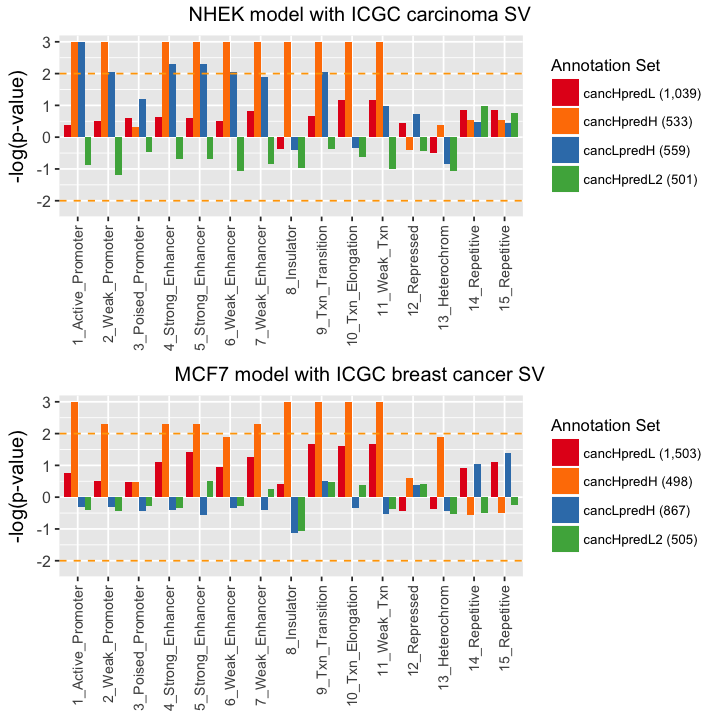

In [38]:
mydir="data/dscores/nhek.icgc_carc/"
pdat1=read.table(paste0(mydir, "circ_genes.dat"), header=TRUE, sep="\t")
pb1 = barplot_circperm_chromstates(pdat1, mynames, mynames1) + theme(legend.position="none")
pdat2=read.table(paste0(mydir,"circ_chrom.dat"), header=TRUE, sep="\t")
pb2 <- barplot_circperm_chromstates(pdat2, mynames1=mynames, mynames2=mynames2, fixChromHMMname=FALSE)
#g1 <- arrangeGrob(pb1, pb2, ncol=2, widths=c(3,9), top="NHEK model with ICGC carcinoma SV")
g1 <- arrangeGrob(pb2, top="NHEK model with ICGC carcinoma SV")
mydir="data/dscores/mcf7.icgc_brca/"
pdat1=read.table(paste0(mydir, "circ_genes.dat"), header=TRUE, sep="\t")
pb1 = barplot_circperm_chromstates(pdat1, mynames, mynames1) + theme(legend.position="none")
pdat2=read.table(paste0(mydir,"circ_chrom.dat"), header=TRUE, sep="\t")
pb2 <- barplot_circperm_chromstates(pdat2, mynames1=mynames, mynames2=mynames2, fixChromHMMname=FALSE)
#g2 <- arrangeGrob(pb1, pb2, ncol=2, widths=c(3,9), top="MCF7 model with ICGC breast cancer SV")
g2 <- arrangeGrob(pb2, top="MCF7 model with ICGC breast cancer SV")
options(repr.plot.width=6, repr.plot.height=6)
gf <- grid.arrange(g1, g2, nrow=2)
ggsave(file="SupFigure8.png", plot=gf, path=supfigdir, width=6, height=6, units="in", dpi=300)